# 삼각형 대형 형성을 위한 학습 데이터 생성

In [1]:
# simulation data
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

# Function to calculate the distance matrix between all pairs of nodes
def calculate_distance_matrix(nodes):
    num_nodes = len(nodes)
    distance_matrix = np.zeros((num_nodes, num_nodes))

    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            distance_matrix[i, j] = euclidean_distance(nodes[i], nodes[j])
            distance_matrix[j, i] = distance_matrix[i, j]

    return distance_matrix

# Function to generate data for training the SOM with a triangular formation
def generate_triangle_data(num_points):
    angle60 = np.radians(60)
    # Define the vertices of an equilateral triangle
    vertices = np.array([[0, 0], [np.cos(0), np.sin(0)], [np.cos(angle60), np.sin(angle60)]])
    data = []

    for _ in range(num_points):
        # Randomly select one of the vertices
        vertex = vertices[np.random.choice(3)]
        # Add some noise to simulate real-world conditions
        noise = np.random.normal(0, 0.1, size=(2,))
        point = vertex + noise
        # Cap x and y coordinates at 1 if they exceed 1
        # Cap x and y coordinates at 0 if they go below 0
        point[0] = min(point[0], 1)
        point[0] = max(point[0], 0)
        point[1] = min(point[1], 1)
        point[1] = max(point[1], 0)        
        data.append(point)
    distance_matrix = calculate_distance_matrix(data)

    return np.array(data),distance_matrix

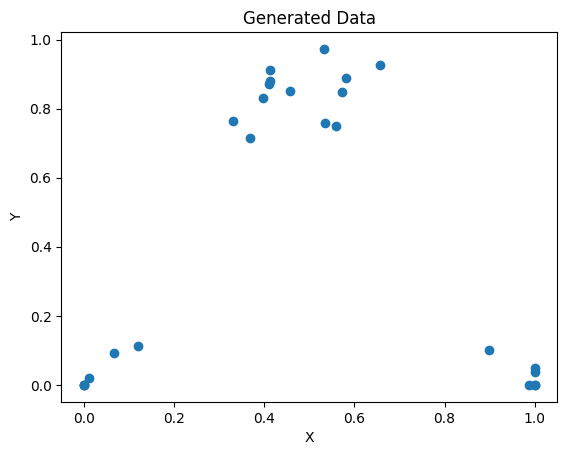

In [2]:
# Generate training data with a triangular formation and distance matrix
data, distance_matrix = generate_triangle_data(25)

# Plot the generated data
plt.scatter(data[:, 0], data[:, 1])
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
np.max(distance_matrix)

1.136172277952245

# Centralized Localization based on the classical som

1. Choose: $alpha_{max} = 0.1$ and $alpha_{min} = 0.01$ to be the maximum and minimum values of the learning rate, respectively. 
2. Choose $r_{max}$ = max_{i,j}H_{c}(i, j) / 2 and rmin = 0.001 to be the maximum and minimum radius of the neighborhood function, respectively. 

3. 
```python
for all nodes j do 
     (x(j),y(j)) = random () 

   end for  % generate uniformly distributed random 
            % positions between [0,1] 
```
// Main loop 
4. 
```python
for t = 1:N_iter-1 do 
    % N_iter is the number of iterations desired 
    $alpha_(t) = alpha_max - t*(alpha_max-alpha_min)/(N_iter-1);$ 
    $r(t) = rmax - t*(rmax-rmin)/(N_iter-1);$ 
    % linearly decrease values 
    (x,y) = random() 
    $BMU = arg{min_{j} || (x, y) - (x_{j} , y_{j} )}||$
    % BMU is index of best matching unit 
    for all nodes j do 
        $h = exp{\frac{H_{c}(BMU, j)}{2r(t)}}$

        $[x(j), y(j)] = [x(j), y(j)] + α(t)h[(x, y) − (x(j), y(j))]$
    % updates new node position
    end for
end for
```

In [19]:
import numpy as np

# 1. learning rate
alpha_max = 0.1
alpha_min = 0.01

# 2. maximum and minimum radius of the neighborhood function
r_max = np.max(distance_matrix)/2
r_min = 0.001

# 3. for all nodes j do
# Number of nodes
num_nodes = 25  # 예시로 25개의 노드를 생성하는 경우

# Initialize an array to store node coordinates
node_coordinates = np.random.rand(num_nodes, 2)

# MAIN LOOP
N_iter = 8000
for t in range(1,N_iter-1):
    # 4. Linearly Decrease Values
    alpha_t = alpha_max - t * (alpha_max - alpha_min)/(N_iter-1)
    r_t = r_max - t * (r_max - r_min)/ (N_iter-1)
    # Randomly Generate (x,y)
    x = np.random.rand()
    y = np.random.rand()
    # BMU 
    bmu_index = np.argmin(np.linalg.norm(node_coordinates - np.array([x,y]), axis=1))
    # For all nodes j do
    for j in range(num_nodes):
        # Calculate h
        h = np.exp(-(distance_matrix[bmu_index, j]**2)/(2*r_t))
        # 6. Update node positions
        node_coordinates[j] = node_coordinates[j] + alpha_t * h * (np.array([x, y]) - node_coordinates[j])

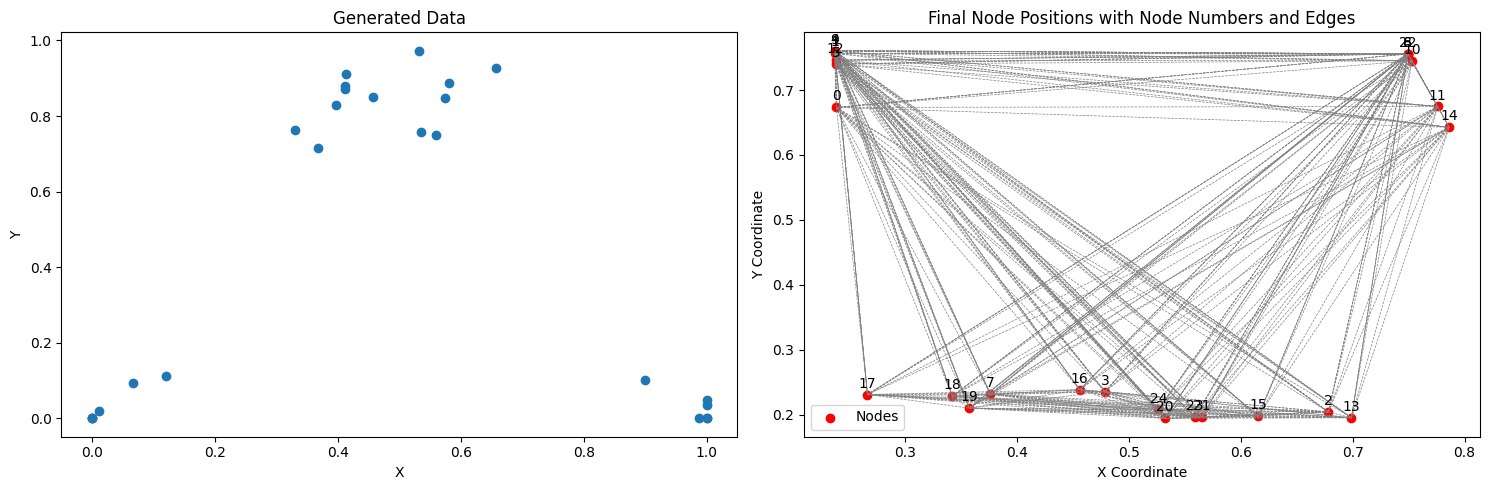

In [20]:
import matplotlib.pyplot as plt

# Plot the original triangular formation and the learned SOM positions
plt.figure(figsize=(15, 5))

# Plot the original triangular formation
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')

# Plot the learned SOM positions with node numbers and edges
plt.subplot(1, 2, 2)
plt.scatter(node_coordinates[:, 0], node_coordinates[:, 1], c='red', marker='o', label='Nodes')

# Annotate each node with its index
for i, (x, y) in enumerate(node_coordinates):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot edges between nodes
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        plt.plot([node_coordinates[i, 0], node_coordinates[j, 0]],
                 [node_coordinates[i, 1], node_coordinates[j, 1]], color='gray', linestyle='--', linewidth=0.5)

plt.title('Final Node Positions with Node Numbers and Edges')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.tight_layout()
plt.show()

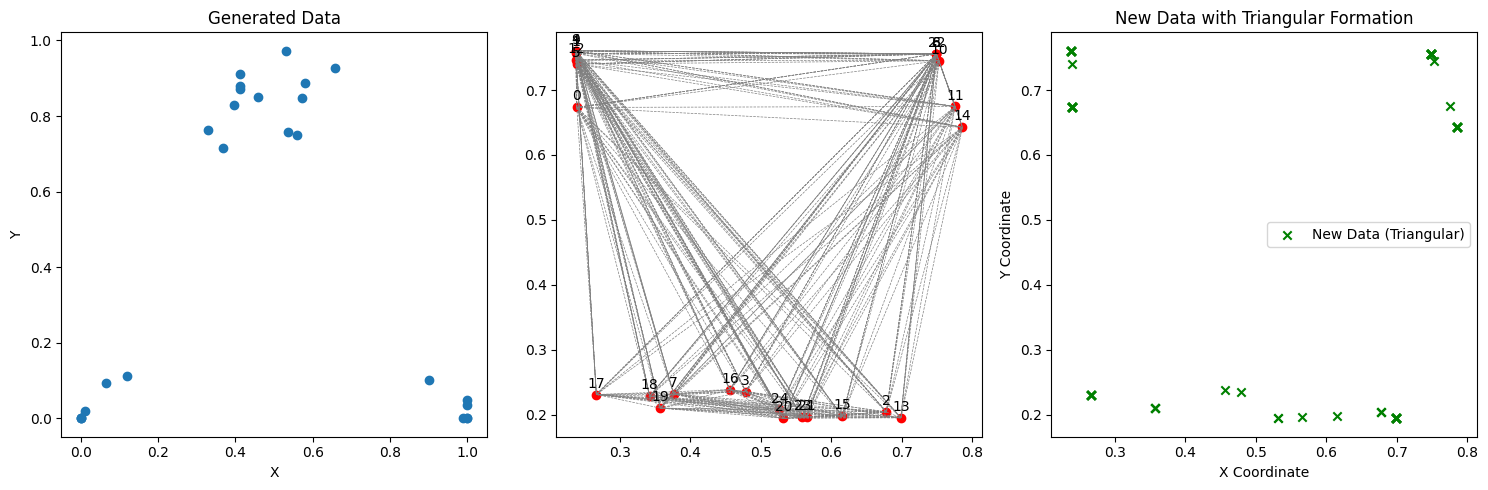

In [22]:
# Function to generate triangular formation using learned SOM
def generate_triangle_from_som(som, num_points):
    # Generate random coordinates
    random_coordinates = np.random.rand(num_points, 2)
    
    # Find the best-matching unit (BMU) for each random coordinate
    bmu_indices = np.argmin(np.linalg.norm(som - random_coordinates[:, np.newaxis, :], axis=2), axis=1)
    
    # Use the BMU coordinates as the generated triangular formation
    generated_triangle = som[bmu_indices]
    
    return generated_triangle

# Generate triangular formation using learned SOM for new data
new_data_triangular = generate_triangle_from_som(node_coordinates, 100)

# Plot the original triangular formation, the learned SOM positions, and the new data with triangular formation
plt.figure(figsize=(15, 5))

# Plot the original triangular formation
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')

# Plot the learned SOM positions with node numbers and edges
plt.subplot(1, 3, 2)
plt.scatter(node_coordinates[:, 0], node_coordinates[:, 1], c='red', marker='o', label='Nodes')

# Annotate each node with its index
for i, (x, y) in enumerate(node_coordinates):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Plot edges between nodes
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        plt.plot([node_coordinates[i, 0], node_coordinates[j, 0]],
                 [node_coordinates[i, 1], node_coordinates[j, 1]], color='gray', linestyle='--', linewidth=0.5)

# Plot the new data with triangular formation
plt.subplot(1, 3, 3)
plt.scatter(new_data_triangular[:, 0], new_data_triangular[:, 1], c='green', marker='x', label='New Data (Triangular)')
plt.title('New Data with Triangular Formation')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

plt.tight_layout()
plt.show()



새 데이터는 SOM을 통해 잘 적용될 수 있음. 단, SOM의 형태를 따라갔으므로 SOM이 원본 데이터를 잘 tracking 해야함.

왜 relative 한 관계는 잘 학습했지만, 그 방향이 반대일까? 

--> 논문에서는 initial weight point와 iteration의 중요성에 대해서 언급함. 